**Challenge 1**
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
rep  = pd.read_csv("/Users/iris/Documents/GitHub/sf18_ds10/challenges/challenges_data/house-votes-84.data", header=None)

In [3]:
rep.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican.
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican.
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat.
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat.
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat.


In [4]:
rep = rep.replace('y',1)
rep = rep.replace('n',0)
rep = rep.replace('?',np.nan)

In [5]:
for column in range(0,16):
    colmean = rep[column].mean()
    rep.loc[np.isnan(rep[column]), column] = colmean

rep.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.362319,1.0,1.0,1.0,0.0,1.000000,republican.
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.812689,republican.


In [6]:
rep.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000,republican.
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689,republican.
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,democrat.
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,democrat.
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000,democrat.


In [7]:
rep[(16)].replace('republican.',1,inplace= True)
rep[(16)].replace('democrat.',0,inplace= True)
rep[(16)].replace('republican',1,inplace= True)
rep[(16)].replace('democrat',0,inplace= True)
rep.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
430,0.0,0.000000,1.0,1.0,1.0,1.0,0.000000,0.00000,1.000000,1.000000,0.0,1.0,1.0,1.0,0.000000,1.0,1
431,0.0,0.000000,1.0,0.0,0.0,0.0,1.000000,1.00000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0
432,0.0,0.503876,0.0,1.0,1.0,1.0,0.000000,0.00000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000,1.0,1
433,0.0,0.000000,0.0,1.0,1.0,1.0,0.567696,0.57619,0.501211,0.504673,0.0,1.0,1.0,1.0,0.000000,1.0,1
434,0.0,1.000000,0.0,1.0,1.0,1.0,0.000000,0.00000,0.000000,1.000000,0.0,1.0,1.0,1.0,0.427518,0.0,1


In [8]:
rep['class'] = rep[16]

In [9]:
rep = rep.drop([(16)], axis=1)

In [10]:
rep.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,class
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000,1
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689,1
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,0
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000,0


In [14]:
from sklearn.cross_validation import train_test_split

X = rep.iloc[:,[0,15]]
Y = rep['class']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=4444)

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print('accuracy score: ' + str(accuracy_score(y_test,pred)))
print(classification_report(y_test,pred))

accuracy score: 0.6641221374045801
             precision    recall  f1-score   support

          0       0.64      0.99      0.78        77
          1       0.92      0.20      0.33        54

avg / total       0.75      0.66      0.59       131



In [18]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
pred = model2.predict(X_test)
print('accuracy score: ' + str(accuracy_score(y_test,pred)))
print(classification_report(y_test,pred))

accuracy score: 0.6870229007633588
             precision    recall  f1-score   support

          0       0.76      0.69      0.72        77
          1       0.61      0.69      0.64        54

avg / total       0.70      0.69      0.69       131



**Challenge 2** <br>
For each, draw the ROC curve and calculate the AUC.

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.7144059644059644


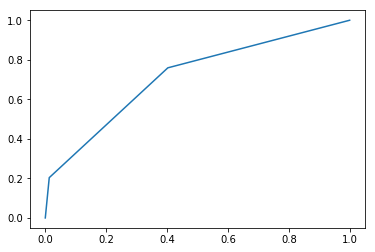

In [21]:
#ROC curve for KNN
model1.fit(X_train,y_train)
probof1 = model1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probof1)
f, axarr = plt.subplots()

axarr.plot(fpr,tpr)
print('AUC: ' + str(roc_auc_score(y_test, probof1)))

AUC: 0.7355699855699855


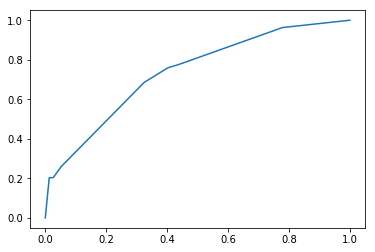

In [22]:
#ROC curve for RandomForest
model2.fit(X_train,y_train)
probof1 = model2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probof1)
f, axarr = plt.subplots()

axarr.plot(fpr,tpr)
print('AUC: ' + str(roc_auc_score(y_test, probof1)))

**Challenge 3** <br>
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [26]:
# KNN, n = 3
from sklearn.cross_validation import cross_val_score

print('KNN: ')
print('accuacy: '+ str(np.mean(cross_val_score(model1,X,Y,scoring='accuracy'))))
print('precision: '+ str(np.mean(cross_val_score(model1,X,Y,scoring='precision'))))
print('f1: ' + str(np.mean(cross_val_score(model1,X,Y,scoring='f1'))))
print('recall: ' +str(np.mean(cross_val_score(model1,X,Y,scoring='recall'))))

KNN: 
accuacy: 0.6206896551724138
precision: 0.5982546361227987
f1: 0.43771123720840005
recall: 0.375


In [27]:
# Random Forest
from sklearn.cross_validation import cross_val_score
print('Random Forest: ')
print('accuacy: '+ str(np.mean(cross_val_score(model2,X,Y,scoring='accuracy'))))
print('precision: '+ str(np.mean(cross_val_score(model2,X,Y,scoring='precision'))))
print('f1: ' + str(np.mean(cross_val_score(model2,X,Y,scoring='f1'))))
print('recall: ' +str(np.mean(cross_val_score(model2,X,Y,scoring='recall'))))

Random Forest: 
accuacy: 0.6758620689655173
precision: 0.6926328502415459
f1: 0.5926238738738738
recall: 0.4761904761904762


**Challenge 4** <br>
For your movie classifiers, calculate the precision and recall for each class.

In [30]:
#read in csv and load into df
df = pd.read_csv('2013_movies.csv')

#clean up dataframe
df = df[df['Budget'] > 0]

#split using train test split
X = df.loc[:,["Budget","DomesticTotalGross","Runtime"]]
y= df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42)


model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         3
      PG-13       0.50      0.69      0.58        13
          R       0.44      0.36      0.40        11

avg / total       0.42      0.48      0.44        27



/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
df_movies = pd.read_csv('2013_movies.csv')

In [32]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [33]:
df_movies = df_movies[df_movies['Budget'] > 0]
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 7 columns):
Title                 89 non-null object
Budget                89 non-null float64
DomesticTotalGross    89 non-null int64
Director              87 non-null object
Rating                89 non-null object
Runtime               89 non-null int64
ReleaseDate           89 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [34]:
X = df_movies.loc[:,["Budget","DomesticTotalGross","Runtime"]]
y = df_movies['Rating']
X_trainM, X_testM, y_trainM, y_testM = train_test_split(X, y, test_size=0.30, random_state=4444)

In [35]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LogisticRegression

In [36]:
model3 = LogisticRegression()
model3.fit(X_trainM,y_trainM)
pred = model3.predict(X_testM)

print(classification_report(y_testM,pred))

             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         6
      PG-13       0.48      0.92      0.63        12
          R       0.50      0.22      0.31         9

avg / total       0.38      0.48      0.38        27



/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
